# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

## Imports & Settings

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import yfinance as yf
#yf.pdr_override() # <== that's all it takes :-)
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [92]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [93]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [94]:
sp500_constituents.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [12]:
start = datetime(2018, 1, 29)
end = datetime.today()

yahoo = yf.download('GOOG', start, end)
yahoo.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1401 entries, 2018-01-29 to 2023-08-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1401 non-null   float64
 1   High       1401 non-null   float64
 2   Low        1401 non-null   float64
 3   Close      1401 non-null   float64
 4   Adj Close  1401 non-null   float64
 5   Volume     1401 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.6 KB


In [15]:
yahoo.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-16,129.279999,130.897995,128.460007,129.110001,129.110001,17548400
2023-08-17,130.449997,132.490997,129.850006,130.460007,130.460007,23665600
2023-08-18,129.059998,129.830002,127.000000,128.110001,128.110001,23619400
2023-08-21,127.849998,129.259995,127.160004,128.929993,128.929993,21851100
2023-08-22,129.130005,130.949997,128.925003,129.690002,129.690002,15214355


In [13]:
# iterating the columns
for col in yahoo.columns:
    print(col)

Open
High
Low
Close
Adj Close
Volume


c:\users\danie\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


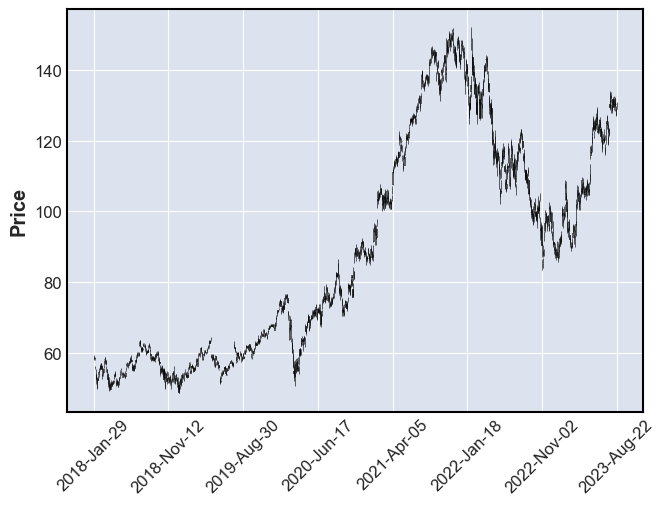

In [14]:
mpf.plot(yahoo.drop('Adj Close', axis = 1), type='candle')
plt.show()

### OECD

In [16]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
2010-01-01,18.400000,11.4
2011-01-01,19.000000,11.3
2012-01-01,18.000000,10.8
2013-01-01,17.799999,10.8
2014-01-01,17.600000,10.7
2015-01-01,17.400000,10.3
2016-01-01,17.000000,10.1


### NASDAQ Symbols

In [17]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11327 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     11327 non-null  bool    
 1   Security Name     11327 non-null  object  
 2   Listing Exchange  11327 non-null  category
 3   Market Category   11327 non-null  object  
 4   ETF               11327 non-null  bool    
 5   Round Lot Size    11327 non-null  float64 
 6   Test Issue        11327 non-null  bool    
 7   Financial Status  5150 non-null   category
 8   CQS Symbol        6177 non-null   object  
 9   NASDAQ Symbol     11326 non-null  object  
 10  NextShares        11327 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 597.7+ KB
